# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#FFCE30'> 1.1 |</span> Purpose</b>
We use this notebook to perform some EDA on the Multi-Class Prediction of Obesity Risk Competition


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD LIBRARY & DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>EDA</b></div>

In [3]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

### <b><span style='color:#FFCE30'> 3.1 |</span> BMI Feature</b>

- BMI (Body Mass Index): BMI is a common feature used to assess obesity.
- Calculate BMI using the formula: BMI = Weight (kg) / (Height (m) * Height (m))
- Check relationship between BMI and 'NObeyesdad'


In [4]:
# Calculate BMI (Weight / (Height^2))
train['BMI'] = train['Weight'] / (train['Height'] ** 2)

train

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad        BMI  
0      Public_Transportation  Overweight_Level_II  28.259565  
1                 Automobile        Normal_Weight  23.422091  
2      Public_Transportation  Insufficient_Weight  17.126706  
3      Public_Transportation     Obesity_Type_III  44.855798  
4      Public_Transportation  Overweight_Level_II  25.599151  
...                      ...                  ...        ...  
20753  Public_Transportation      Obesity_Type_II  36.587084  
20754  Public_Transportation  Insufficient_Weight  17.099278  
20755  Public_Transportation      Obesity_Type_II  31.889841  
20756             Automobile  Overweight_Level_II  28.899693  
20757  Public_Transportation      Obesity_Type_II  35.800157  

[20758 rows x 19 columns]

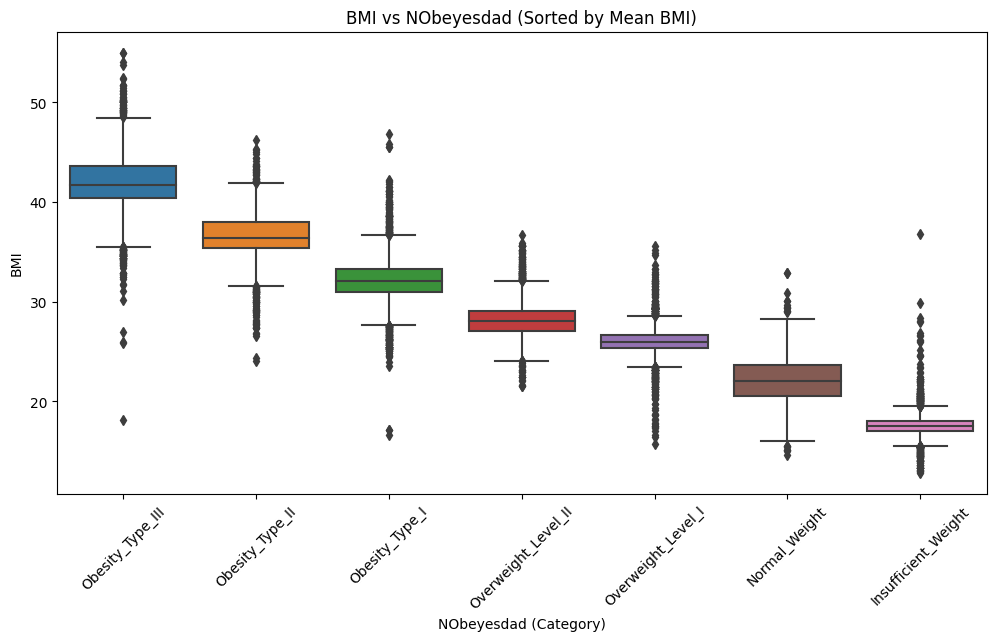

In [5]:
# Calculate the mean BMI for each category of NObeyesdad
mean_bmi_by_category = train.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index

# Plot NObeyesdad (categorical) against BMI with sorted categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=train, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('BMI')
plt.title('BMI vs NObeyesdad (Sorted by Mean BMI)')
plt.show()

- There seems to be quite clear segregation between BMI and each NObeyesdad (category)
- Overlap of some data points still exists between each but majority of the data from 25 quantile to 75 quantile of each category can be well seperated.
- Based on this article, we can see that even though it is intuitive to note that BMI itself should be able to predict well the Obese category but it is not always the case. 
https://www.sciencedirect.com/science/article/pii/S2352340919306985

### Reasons why BMI may not 100% explain the target classes

BMI (Body Mass Index) is a commonly used metric to assess whether an individual falls into various categories of body weight, such as underweight, normal weight, overweight, or obese. However, it does not provide a complete or perfect prediction of an individual's obesity level (NObesity) for several reasons:

- **Simplicity of BMI:** BMI is a simple calculation based on an individual's weight and height (BMI = weight / height^2). It does not take into account other important factors that contribute to an individual's obesity level, such as muscle mass, body composition, bone density, and distribution of fat. As a result, individuals with the same BMI may have different body compositions and health profiles.

- **Variability among individuals:** People have unique physiological characteristics, genetics, and metabolic rates. Two individuals with the same BMI may have different levels of fat tissue and overall health. Some individuals may have a higher percentage of muscle mass, which can increase their BMI without indicating obesity.

- **Ethnic and gender differences:** BMI thresholds for defining obesity were originally developed based on data from Western populations and may not be equally applicable to individuals from diverse ethnic backgrounds. Different ethnic groups may have different body fat distributions and health risks at the same BMI.

- **Health risks:** Obesity is not solely determined by weight and height. Health risks associated with obesity, such as cardiovascular disease, diabetes, and metabolic syndrome, are influenced by various factors, including genetics, dietary habits, physical activity, and overall lifestyle.

- **Limitations of classification:** BMI categories, such as "Overweight Level I" or "Obesity Type II," are somewhat arbitrary and do not capture the full spectrum of health risks associated with obesity. Different individuals within the same BMI category may have different health outcomes.

- **Temporal changes:** BMI may not reflect changes in an individual's health over time. It provides a static measure at a single point in time and does not account for fluctuations in weight, changes in muscle mass, or improvements in overall health.

- **Medical assessment:** To assess an individual's obesity level accurately and evaluate associated health risks, healthcare professionals typically use a combination of measures, including BMI, waist circumference, body fat percentage, and clinical assessments. BMI is just one part of a comprehensive evaluation.

### <b><span style='color:#FFCE30'> 3.2 |</span> Age</b>


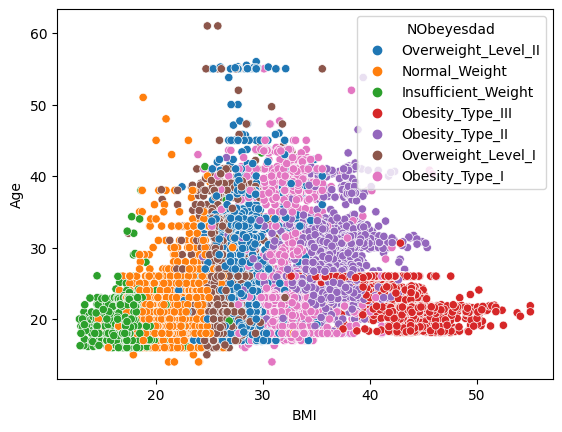

In [6]:
sns.scatterplot(x='BMI', y='Age', hue='NObeyesdad', data=train)
plt.show()

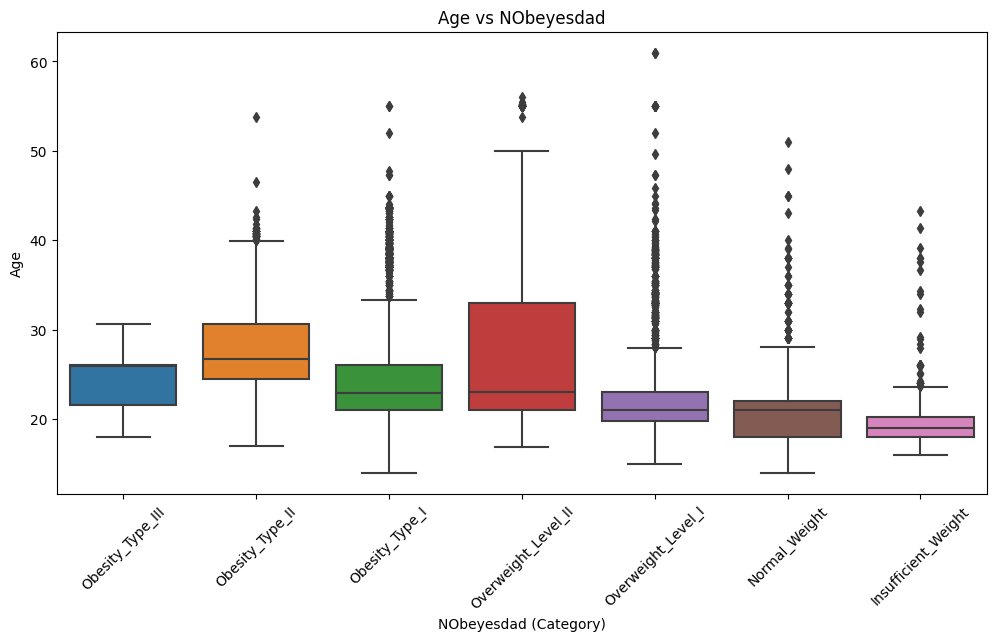

In [7]:
# Plot NObeyesdad (categorical) against BMI with sorted categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=train, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('Age')
plt.title('Age vs NObeyesdad')
plt.show()

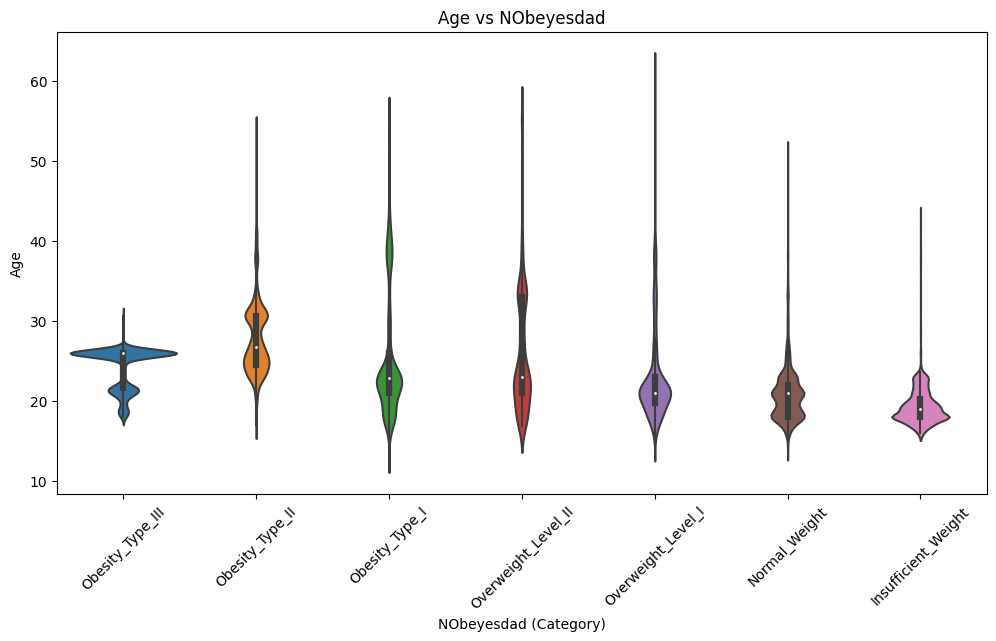

In [8]:
# Plot NObeyesdad (categorical) against BMI with sorted categories
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Age', data=train, order=mean_bmi_by_category)
plt.xticks(rotation=45)
plt.xlabel('NObeyesdad (Category)')
plt.ylabel('Age')
plt.title('Age vs NObeyesdad')
plt.show()

### <b><span style='color:#FFCE30'> 3.3 |</span> Meal Habits</b>

Meal Habits: Combine features of 'FAVC' (frequent consumption of high-calorie food) and 'FCVC' (frequency of vegetables consumption) into a single feature representing overall eating habits.

In [9]:
train['FAVC'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'FAVC' column
train['FAVC_encoded'] = label_encoder.fit_transform(train['FAVC'])

# Display the first few rows to check the encoding
print(train[['FAVC', 'FAVC_encoded']].head())

  FAVC  FAVC_encoded
0  yes             1
1  yes             1
2  yes             1
3  yes             1
4  yes             1


In [11]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  \
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  28.259565   
1  1.000000         no             Automobile        Normal_Weight  23.422091   
2  1.673584         no  Public_Transportation  Insufficient_Weight  17.126706   
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  44.855798   
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  25.599151   

   FAVC_encoded  
0             1  
1             1  
2             1  
3             1  
4             1

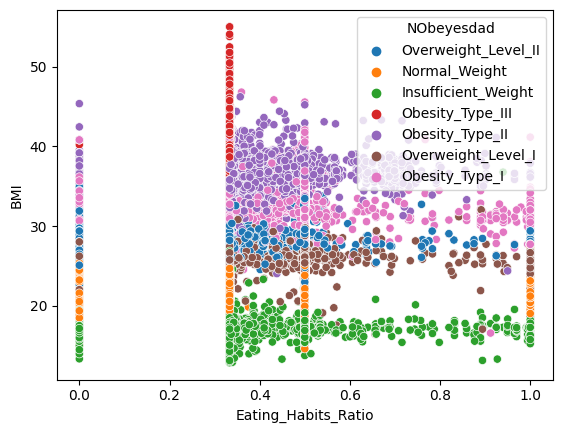

In [12]:
# Calculate the ratio of high-calorie food consumption to vegetables consumption
train['Eating_Habits_Ratio'] = train['FAVC_encoded'] / train['FCVC']

sns.scatterplot(x='Eating_Habits_Ratio',y='BMI',hue='NObeyesdad' ,data=train)

plt.show()

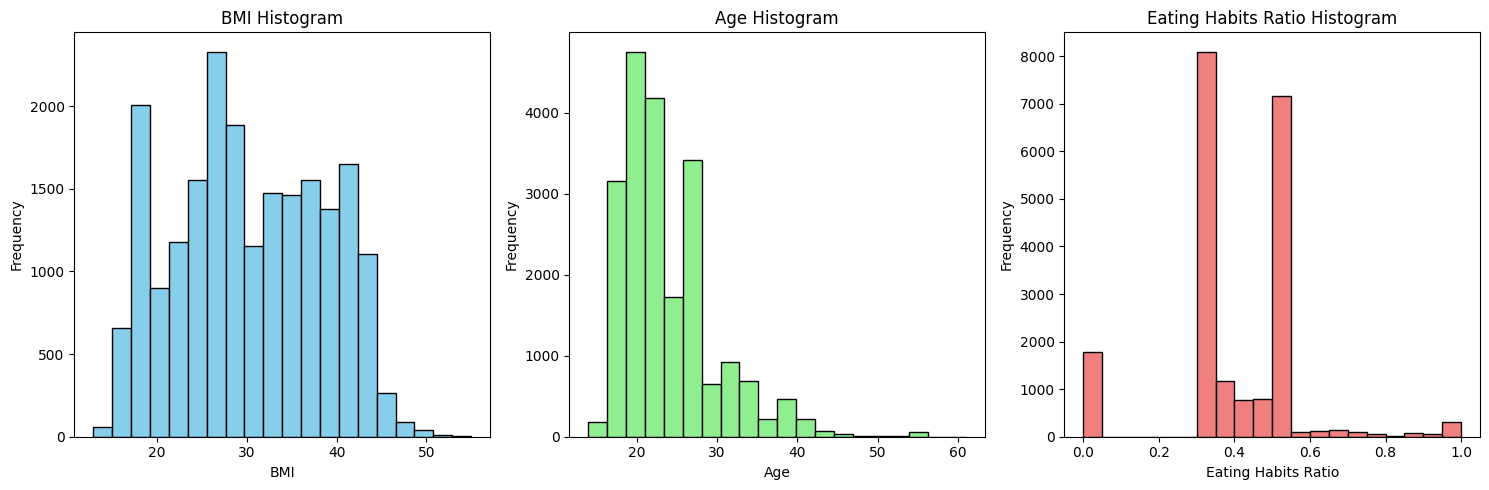

In [13]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for 'BMI', 'Age', and 'Eating_Habits_Ratio' side by side
axes[0].hist(train['BMI'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('BMI Histogram')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')

axes[1].hist(train['Age'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Age Histogram')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

axes[2].hist(train['Eating_Habits_Ratio'], bins=20, color='lightcoral', edgecolor='black')
axes[2].set_title('Eating Habits Ratio Histogram')
axes[2].set_xlabel('Eating Habits Ratio')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


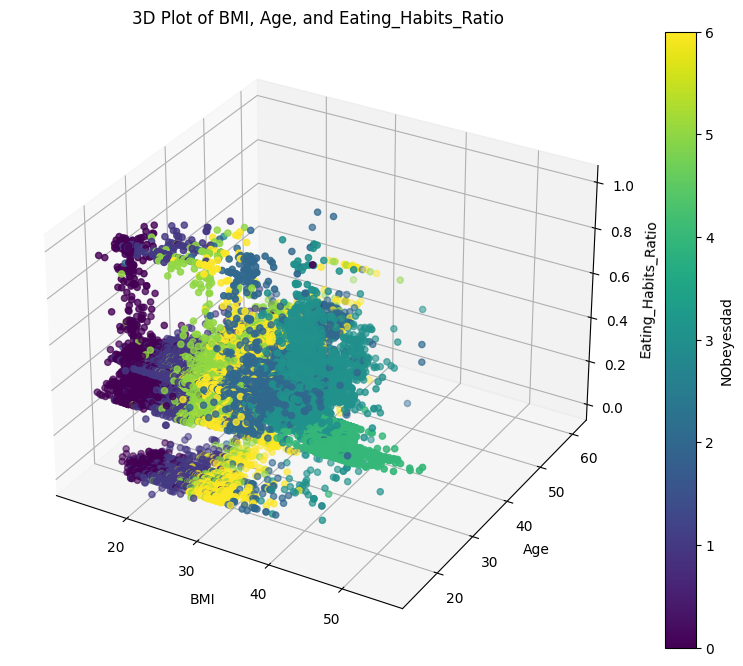

In [14]:
# Encode 'NObeyesdad' column to numeric labels
train['NObeyesdad_encoded'] = train['NObeyesdad'].astype('category').cat.codes

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(
    train['BMI'],
    train['Age'],
    train['Eating_Habits_Ratio'],
    c=train['NObeyesdad_encoded'],  # Use encoded values for coloring
    cmap='viridis',  # Choose a colormap for coloring
    s=20  # Marker size
)

# Add labels to axes
ax.set_xlabel('BMI')
ax.set_ylabel('Age')
ax.set_zlabel('Eating_Habits_Ratio')

# Add a color bar to the plot
colorbar = plt.colorbar(scatter)
colorbar.set_label('NObeyesdad')

# Set the title
plt.title('3D Plot of BMI, Age, and Eating_Habits_Ratio')

# Show the plot
plt.show()


### <b><span style='color:#FFCE30'> 3.4 |</span> Numeric Cols</b>

In [15]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  \
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  28.259565   
1  1.000000         no             Automobile        Normal_Weight  23.422091   
2  1.673584         no  Public_Transportation  Insufficient_Weight  17.126706   
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  44.855798   
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  25.599151   

   FAVC_encoded  Eating_Habits_Ratio  NObeyesdad_encoded  
0             1             0.500000                   6  
1             1             0.500000                   1  
2             1             0.531764                   0  
3             1             0.333333                   4  
4             1             0.373181                   6

In [16]:
# Select numeric columns from the train dataset
numeric_columns = train.select_dtypes(include=['number'])

# Set features to the numeric columns
features = numeric_columns.columns

# Drop some features
features = features.drop(['NObeyesdad_encoded', 'FAVC_encoded', 'id'])



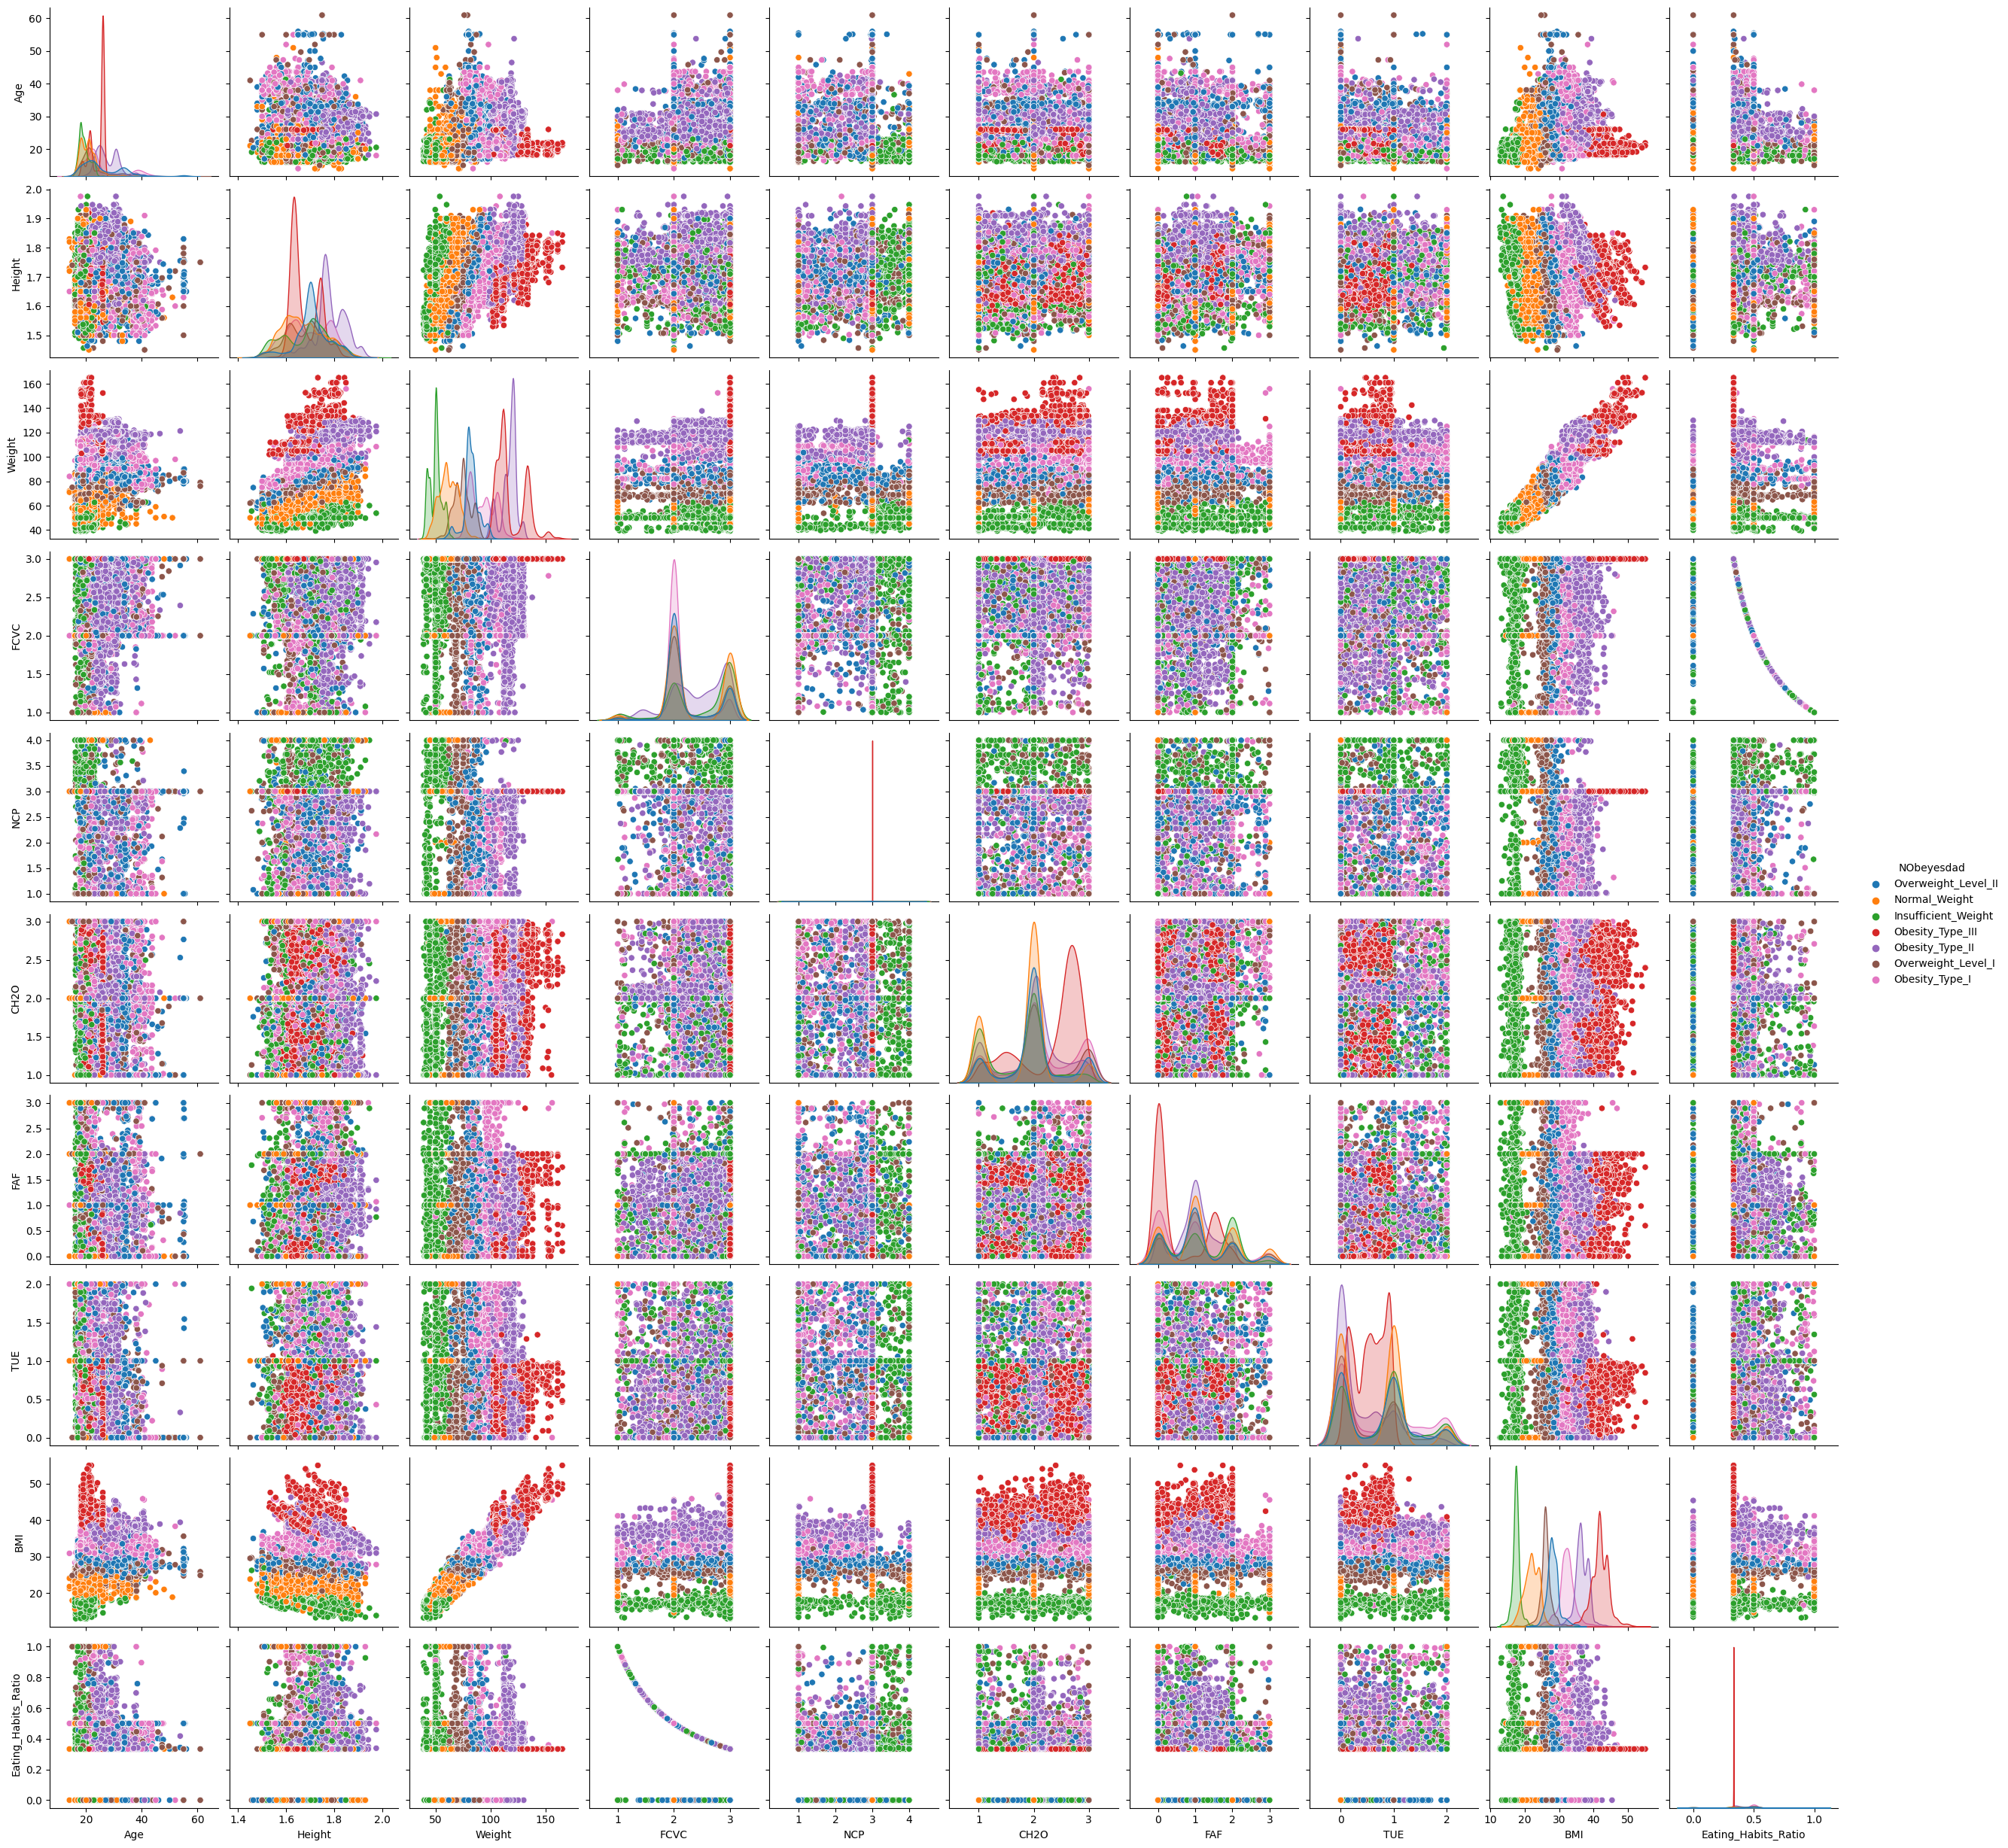

In [17]:
sns.pairplot(train,
             vars= features,
             hue='NObeyesdad')
plt.show()

### <b><span style='color:#FFCE30'> 3.5 |</span> Categorical Cols</b>

In [18]:
# Select non-numeric columns from the train dataset
non_numeric_columns = train.select_dtypes(exclude=['number'])

# Set features to the numeric columns
features_non_numeric = non_numeric_columns.columns
features_non_numeric

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [19]:
#shows as well for non-numeric fields
train.describe(include=['O'])

Gender family_history_with_overweight   FAVC       CAEC  SMOKE    SCC  \
count    20758                          20758  20758      20758  20758  20758   
unique       2                              2      2          4      2      2   
top     Female                            yes    yes  Sometimes     no     no   
freq     10422                          17014  18982      17529  20513  20071   

             CALC                 MTRANS        NObeyesdad  
count       20758                  20758             20758  
unique          3                      5                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq        15066                  16687              4046

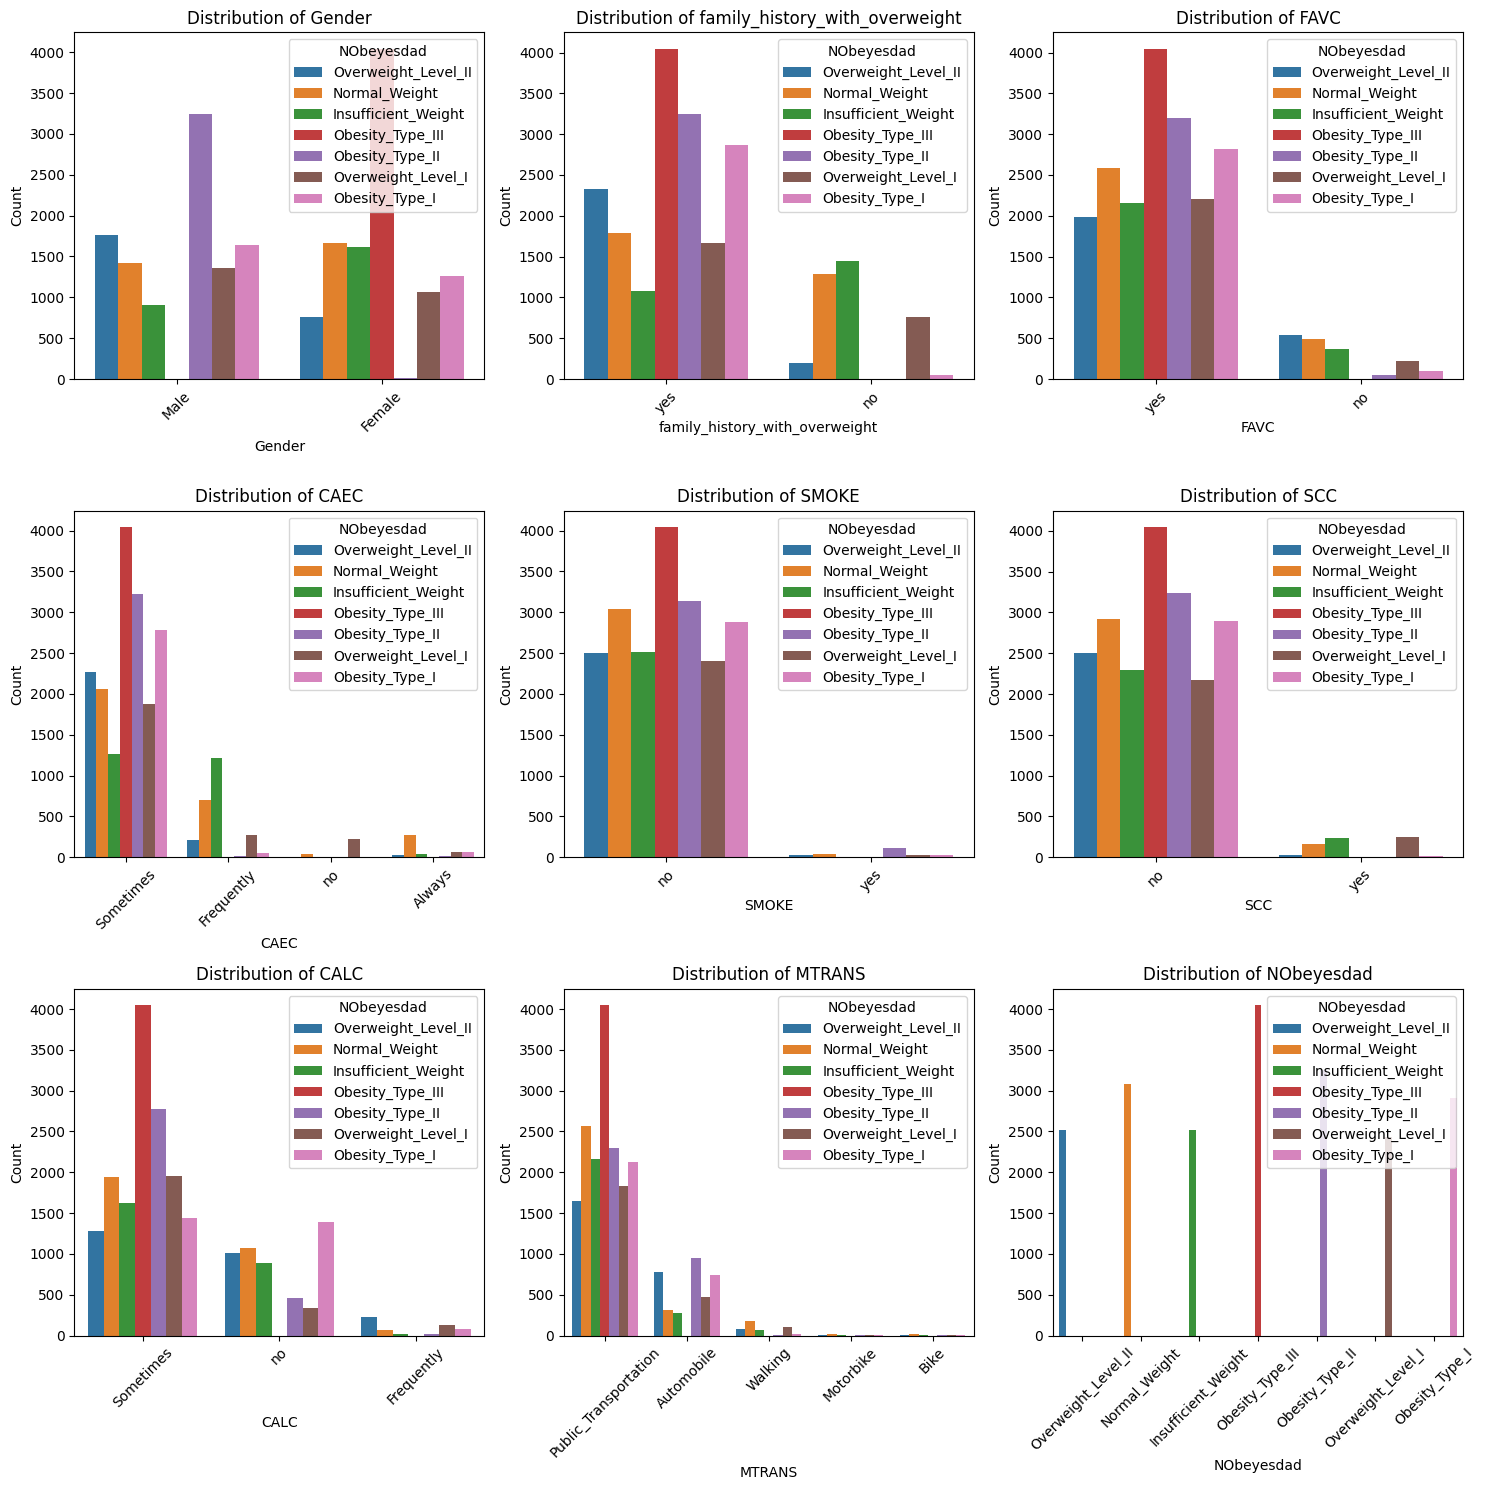

In [20]:
# Define the number of columns for the grid
num_cols = 3

# Calculate the number of rows needed
num_features = len(features_non_numeric)
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through non-numeric columns and create count plots with 'NObeyesdad' as hue
for i, column in enumerate(features_non_numeric):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(data=train, x=column, hue='NObeyesdad', ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Distribution of {column}')

# Remove empty subplots if the number of features is not a multiple of num_cols
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()